In [1]:
using NamedTrajectories
using QuantumCollocation

In [2]:
data_path = "data/transmon_3_T_200_dt_15.0_Q_200.0_R_L1_10.0_max_iter_5000_dda_bound_1.0e-5_00000.jld2"
data = load_problem(data_path; return_data=true)

Loading data dict from data/transmon_3_T_200_dt_15.0_Q_200.0_R_L1_10.0_max_iter_5000_dda_bound_1.0e-5_00000.jld2:

   final fidelity 1 = 0.9489357195288758
   final fidelity 2 = 0.9549364424600906


Dict{String, Any} with 7 entries:
  "options"          => Options{Float64}(1.0e-8, 100.0, 5000, 1.0e6, 1.0, 1.0e-…
  "final fidelity 1" => 0.948936
  "integrators"      => AbstractIntegrator[QuantumStatePadeIntegrator{Float64}(…
  "params"           => Dict{Symbol, Any}(:eval_hessian=>true, :objective_terms…
  "system"           => QuantumSystem{Float64}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.…
  "final fidelity 2" => 0.954936
  "trajectory"       => NamedTrajectory{Float64}([1.0 1.0 … 0.705673 0.705778; …

In [3]:
traj = data["trajectory"]
system = data["system"]
integrators = data["integrators"]

4-element Vector{AbstractIntegrator}:
 QuantumStatePadeIntegrator{Float64}(nothing, nothing, [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … -1.0518999959890363 0.0; 0.0 0.0 … 0.0 -1.064367544664884], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 1.0 … 0.0 0.0; 1.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 3.605551275463989; 0.0 0.0 … 3.605551275463989 0.0], [0.0 0.0 … 0.0 0.0; -0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … -0.0 0.0]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 1.0 … 0.0 0.0; -1.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 3.605551275463989; 0.0 0.0 … -3.605551275463989

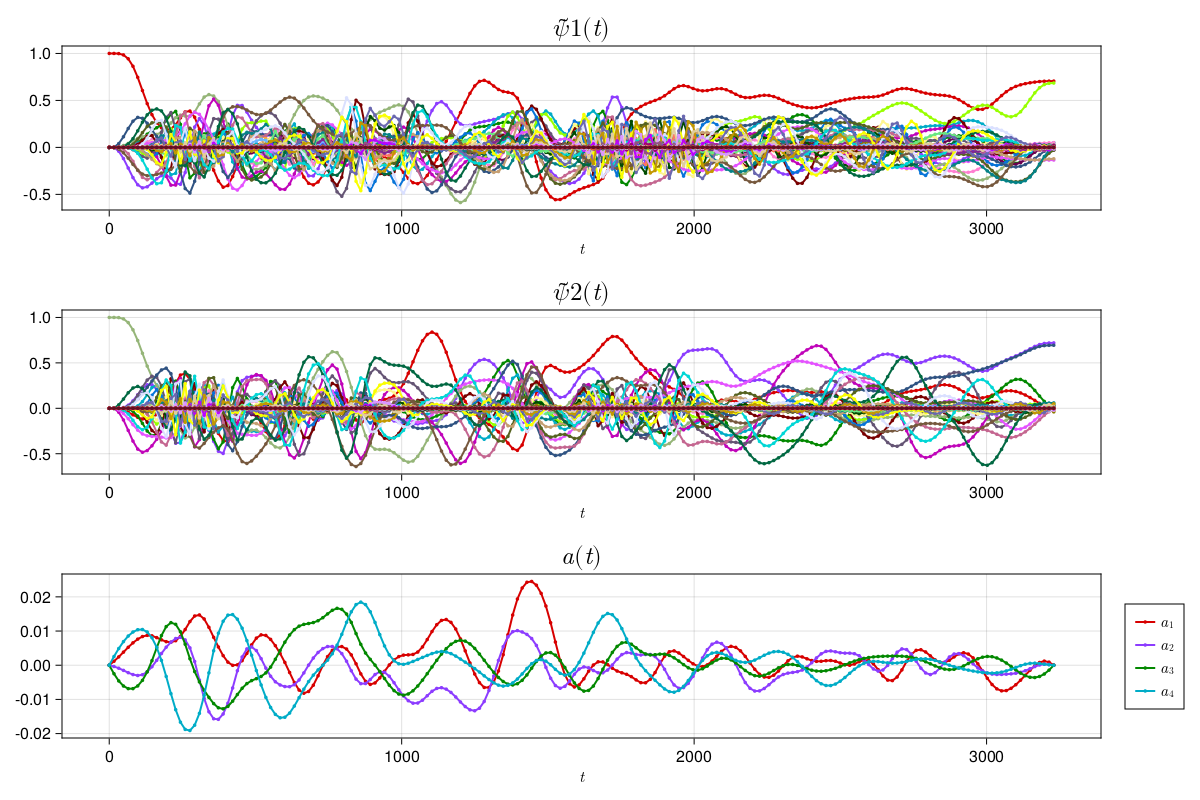

In [4]:
plot(traj, [:ψ̃1, :ψ̃2, :a]; ignored_labels=[:ψ̃1, :ψ̃2])

In [5]:
ψ̃1ψ̃2 = vcat(traj.ψ̃1, traj.ψ̃2)

168×200 Matrix{Float64}:
 1.0   1.0           0.99814       0.98433      …   0.705673      0.705778
 0.0   1.2066e-18   -0.0411394    -0.118596         0.0030364     0.00585032
 0.0   2.00159e-18   4.56865e-5    0.000906719      0.0120174     0.0139529
 0.0  -1.72194e-19   2.65373e-5    0.0010246        0.0403406     0.0497329
 0.0   5.70535e-19   2.2463e-6    -5.84796e-5       0.682392      0.685095
 0.0  -2.76999e-19  -1.76416e-7   -4.80229e-6   …   0.0484072     0.0506338
 0.0   1.31405e-18   5.7897e-10    1.58096e-7       0.00580969    0.00693767
 0.0   1.25873e-19  -7.20213e-11   8.59981e-8      -0.00478644   -0.00586229
 0.0   1.59519e-19   4.95216e-11   7.94603e-11      0.0233324     0.0241649
 0.0   6.07498e-19  -2.91854e-12  -1.87331e-9       0.0103223     0.00980924
 ⋮                                              ⋱                
 0.0   1.67031e-20   2.80708e-12  -1.25588e-8      -0.0014066    -0.000721691
 0.0  -1.63555e-19  -1.50716e-11  -2.18284e-9   …   0.00138652    0.0

In [8]:
new_traj = remove_component(traj, :ψ̃1)
new_traj = remove_component(new_traj, :ψ̃2)
add_component!(new_traj, :ψ̃1ψ̃2, ψ̃1ψ̃2)
new_traj.names

(:a, :da, :dda, :Δt, :ψ̃1ψ̃2)

In [9]:
ψ̃¹_final = rollout(traj.initial.ψ̃1, traj.a, traj.Δt, system; integrator=exp)[:, end]

ψ̃²_final = rollout(traj.initial.ψ̃2, traj.a, traj.Δt, system; integrator=exp)[:, end]

final_fidelity_1 = fidelity(ψ̃¹_final, traj.goal.ψ̃1)
final_fidelity_2 = fidelity(ψ̃²_final, traj.goal.ψ̃2)

println("Final fidelity 1: $final_fidelity_1")
println("Final fidelity 2: $final_fidelity_2")

Final fidelity 1: 0.8831317424404179
Final fidelity 2: 0.9283534312155872


In [10]:
transmon_levels = 3
cavity_levels = 14
cavity_forbidden_states = cavity_levels .* [1, 2, 3, 4]
transmon_forbidden_states = (2 * (transmon_levels - 1) * cavity_levels + 1) : (2 * transmon_levels * cavity_levels)

57:84

In [11]:
cavity_forbidden_states, transmon_forbidden_states

([14, 28, 42, 56], 57:84)

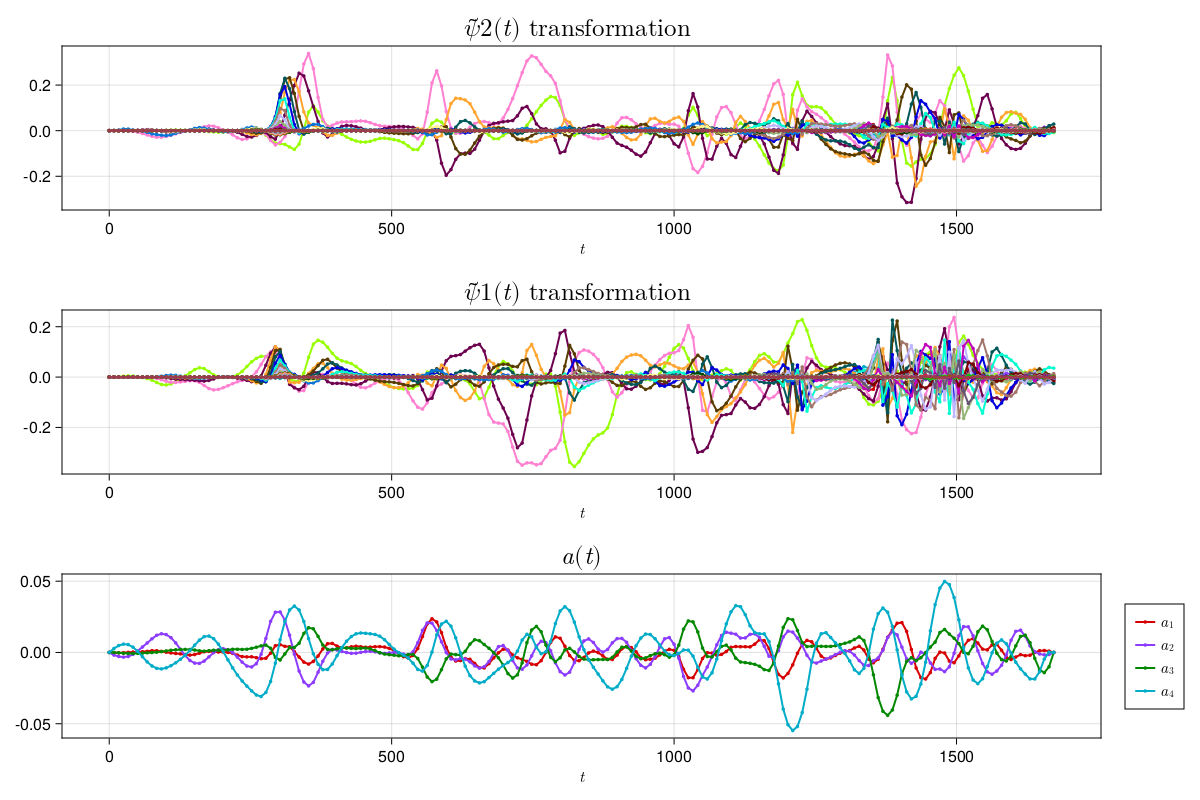

In [13]:
maps = Dict(
    :ψ̃1 => ψ̃ -> ψ̃[[cavity_forbidden_states; transmon_forbidden_states]],
    :ψ̃2 => ψ̃ -> ψ̃[[cavity_forbidden_states; transmon_forbidden_states]],
)
plot(traj, [:a];transformations=maps)

In [14]:
traj.components.ψ̃1

1:84

In [15]:
84 ÷ 3 * 2

56

In [10]:
integrators[1]

QuantumStatePadeIntegrator{Float64}(nothing, nothing, [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … -1.0518999959890363 0.0; 0.0 0.0 … 0.0 -1.064367544664884], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 1.0 … 0.0 0.0; 1.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 3.605551275463989; 0.0 0.0 … 3.605551275463989 0.0], [0.0 0.0 … 0.0 0.0; -0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … -0.0 0.0]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 1.0 … 0.0 0.0; -1.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 3.605551275463989; 0.0 0.0 … -3.605551275463989 0.0]], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0